In [13]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras import Sequential

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [14]:
# Reading the csv file
hunter_dataSet = pd.read_csv("C:\\Users\\Varsha G C\\Downloads\\data.csv")

In [40]:
# Shows first 5 values(including header)
hunter_dataSet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,22477.529574,22883.545936,22106.231413,22506.888885,22506.888885,2.575758e+10
std,4112.225044,4214.208095,4051.222106,4134.990347,4134.990347,1.291686e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.044911e+09
25%,19329.862305,19636.722168,19038.084961,19330.979492,19330.979492,1.642985e+10
50%,21844.954101,22483.299805,21571.644531,22017.412110,22017.412110,2.397027e+10
75%,26479.866699,26909.723145,26136.885254,26501.256348,26501.256348,3.137986e+10
max,30708.738281,31389.539063,30327.943359,30695.468750,30695.468750,1.189925e+11


In [2]:
# Seeing the data types of each field
hunter_dataSet.info()

NameError: name 'hunter_dataSet' is not defined

In [3]:
# Lists all the columns in the data set
hunter_dataSet.columns

NameError: name 'hunter_dataSet' is not defined

In [4]:
# Gives number of rows and columns
hunter_dataSet.describe()

NameError: name 'hunter_dataSet' is not defined

In [5]:
# One-hot encoding
hunter_dataSet = pd.get_dummies(hunter_dataSet, columns=['order_dow'])

NameError: name 'pd' is not defined

In [6]:
# Getting rid of people who didn't reorder
hunter_dataSet = hunter_dataSet.loc[hunter_dataSet["reordered"] != 0]

NameError: name 'hunter_dataSet' is not defined

In [7]:
hunter_dataSet.head()

NameError: name 'hunter_dataSet' is not defined

In [8]:
# Dropping irrelevant columns
hunter_dataSet.drop(['reordered', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6',], axis=1, inplace=True)

NameError: name 'hunter_dataSet' is not defined

In [22]:
# Isolating features and labels(target values)
labels = np.array(hunter_dataSet['days_since_prior_order'])
hunter_dataSet= hunter_dataSet.drop('days_since_prior_order', axis = 1)
feature_list = list(hunter_dataSet.columns)
hunter_dataSet = np.array(hunter_dataSet)

In [23]:
# Splitting into training and validation sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(hunter_dataSet, labels, test_size = 0.20, random_state = 42)

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [25]:
# Creating a linear regression model
'''from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(train_features, train_labels)
y_train_pred = lr.predict(train_features)
y_test_pred = lr.predict(test_features)
train_score = r2_score(train_labels, y_train_pred)
test_score = r2_score(test_labels, y_test_pred)
print(f"Train R2: {train_score:.3f}, Test R2: {test_score:.3f}")
rmse = 100 - np.sqrt(mean_squared_error(test_labels, y_test_pred))
print('Root Mean Squared Error:', round(rmse, 2),'%')
#display = PredictionErrorDisplay(y_true=test_labels, y_pred=y_test_pred)
#display.plot()
plt.scatter(test_features, test_labels, color="black")
plt.plot(test_features, y_test_pred, color="blue", linewidth=3)'''







#plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

'from sklearn.linear_model import LinearRegression, Ridge\nfrom sklearn.metrics import r2_score, mean_squared_error\nlr = LinearRegression()\nlr.fit(train_features, train_labels)\ny_train_pred = lr.predict(train_features)\ny_test_pred = lr.predict(test_features)\ntrain_score = r2_score(train_labels, y_train_pred)\ntest_score = r2_score(test_labels, y_test_pred)\nprint(f"Train R2: {train_score:.3f}, Test R2: {test_score:.3f}")\nrmse = 100 - np.sqrt(mean_squared_error(test_labels, y_test_pred))\nprint(\'Root Mean Squared Error:\', round(rmse, 2),\'%\')\n#display = PredictionErrorDisplay(y_true=test_labels, y_pred=y_test_pred)\n#display.plot()\nplt.scatter(test_features, test_labels, color="black")\nplt.plot(test_features, y_test_pred, color="blue", linewidth=3)'

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
temp, counts = np.unique(predictions, return_counts=True)

R2 score 0.0008175185116620076
Root Mean Squared Error: 91.69 %


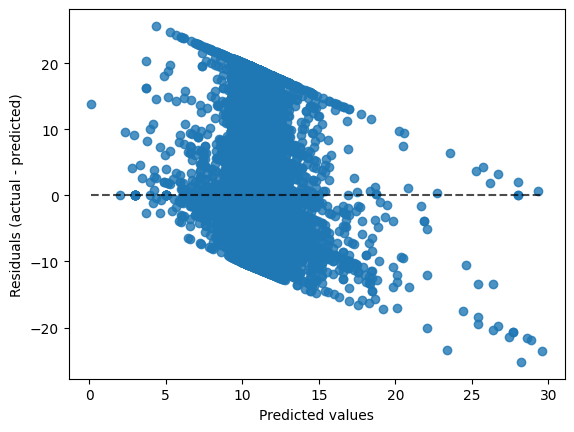

In [27]:
# Calculate mean absolute percentage error (MAPE)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, PredictionErrorDisplay, r2_score
print("R2 score", r2_score(y_true=test_labels, y_pred=predictions))
rmse = 100 - np.sqrt(mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error:', round(rmse, 2),'%')
display = PredictionErrorDisplay(y_true=test_labels, y_pred=predictions)
display.plot()

In [28]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: add_to_cart_order    Importance: 0.49
Variable: order_hour_of_day    Importance: 0.35
Variable: order_dow_0          Importance: 0.17


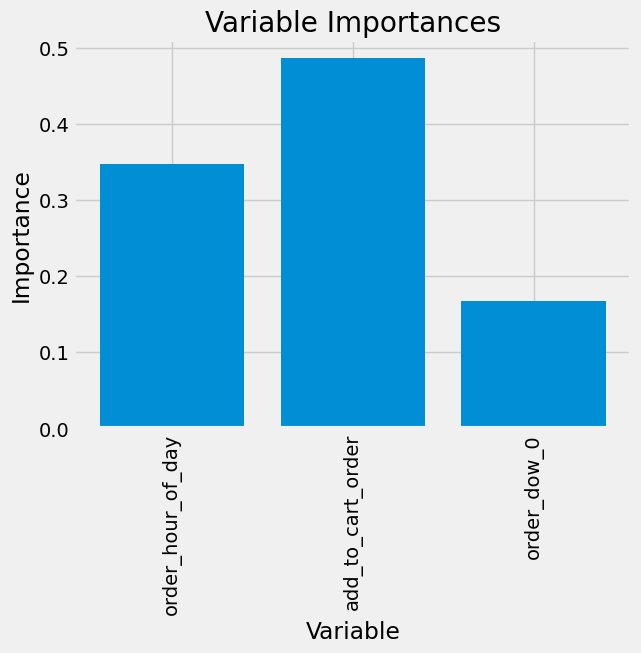

In [29]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

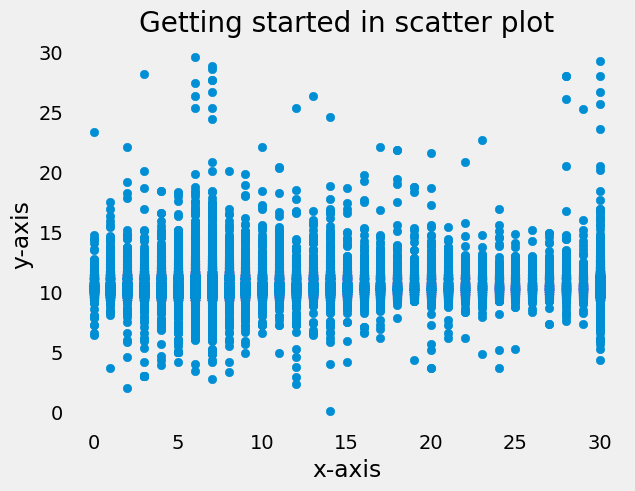

In [30]:
plt.title('Getting started in scatter plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()

plt.scatter(test_labels, predictions)
plt.show()


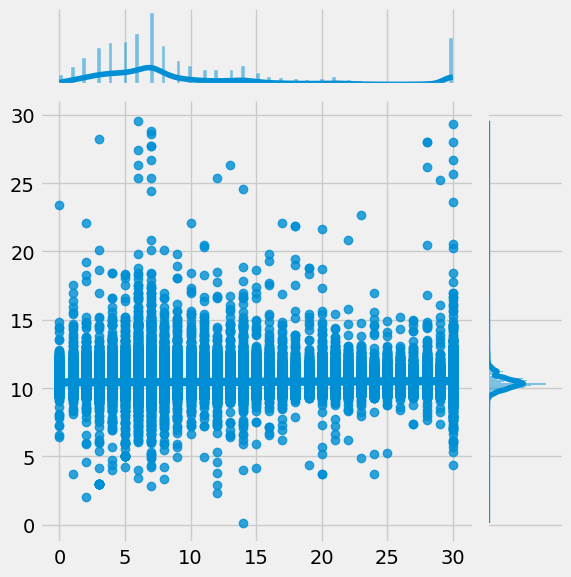

In [31]:
import seaborn as sns
sns.jointplot(x=test_labels, y=predictions, kind='reg')